# T03 - SYMPY

René Alejandro González Velázquez (752235)

Ingenieria civil

03/09/2024

1. El perímetro de un triángulo isósceles es de 20 cm. Imagina que este triángulo rota centrado en su eje de simetría para formar la ilusión de un cono. ¿Cuánto deben medir sus lados para que el volumen generado por la rotación sea el mayor posible?

In [3]:
import sympy as sp
a = sp.var('a')
b = 20 - 2*a
h = sp.sqrt(a**2 - (b/2)**2)
r = b / 2
volumen = (1/3) * sp.pi * r**2 * h

volume_diff = sp.diff(volumen, a)
a_opt = sp.solve(volume_diff, a)
b_opt = b.subs(a, a_opt[0])
volume_opt = volumen.subs(a, a_opt[0]).subs(b, b_opt)

a_opt, b_opt, volume_opt

([6.00000000000000, 10.0000000000000], 8.00000000000000, 23.8513917599978*pi)

2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol en un parque. Es una portería simple que tendrá sólo dos postes y el travesaño:

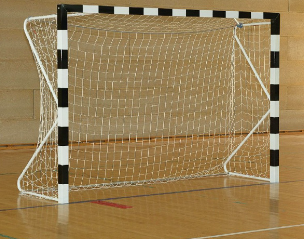

Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

In [6]:
x = sp.var('x')
log  = 6
travesaño = log - 2 * x
area = x * travesaño
area_diff = sp.diff(area, x)
critical = sp.solve(area_diff, x)
h = critical[0]
l = log - 2 * h
max_area = area.subs(x, h)
h, l, max_area

(3/2, 3, 9/2)

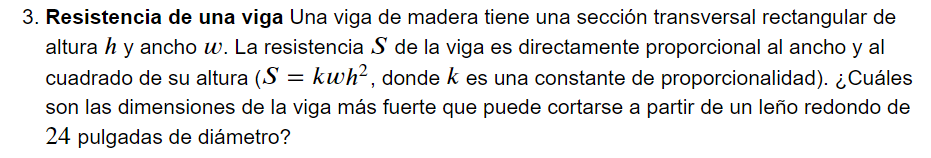

Resistencia de una viga. Una viga de madera tiene una seccion transversal rectangular de altura h y ancho w. La resistencia S de la viga (S = kwh**2, donde k es una constante de proporcionalidad) Cuales son las dimesniones de la viga más fuerte que puede cortarse a partir de un leño redondo de 24 pulgadas de diametro?


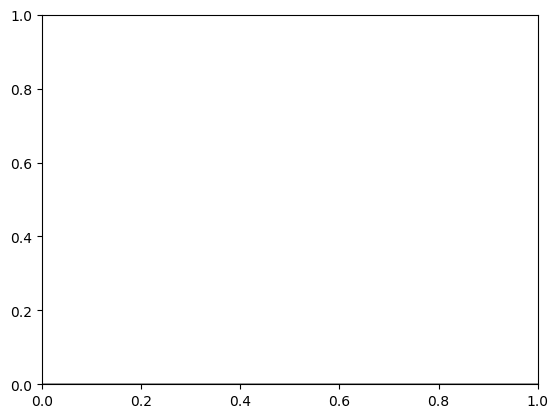

<class 'AttributeError'>: 'Text' object has no property 'a'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sp
w = sp.var('w') 
h = sp.var('h')
d = 24
eq1 = w**2 + h**2 - d**2
k = sp.var('k')
resistencia = k * w * h**2
w_expr = sp.solve(eq1, w)[1] 
resistencia_expr = resistencia.subs(w, w_expr)
resistencia_diff = sp.diff(resistencia_expr, h)
critico = sp.solve(resistencia_diff, h)
ho = critico[0]
a = w_expr.subs(h, ho)
fig, ax = plt.subplots()
C = patches.Circle((0, 0), d / 2, fill=False, color='brown', lw=4)
S = patches.Rectangle((-a / 2, -ho / 2), a, ho, fill=False, color='k')
ax.add_artist(S)
ax.add_artist(C)
plt.text(0, ho / 2 + 1, f'$w = {a:.2f}$', a='center')
plt.text(a / 2 + 1, 0, f'$h = {ho:.2f}$', va='center')
plt.plot([-d / 2, d / 2], [0, 0], 'r--')
plt.text(0, 2, f'{d}', ha='center', color='red')
plt.ylim([-d / 2 - 5, d / 2 + 5])
plt.axis('off')
plt.show()

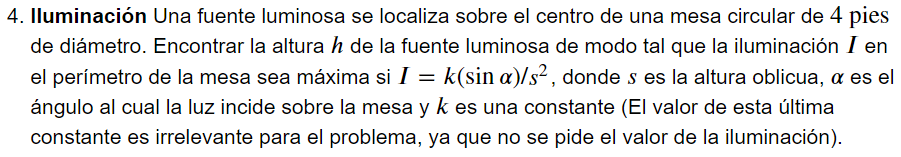

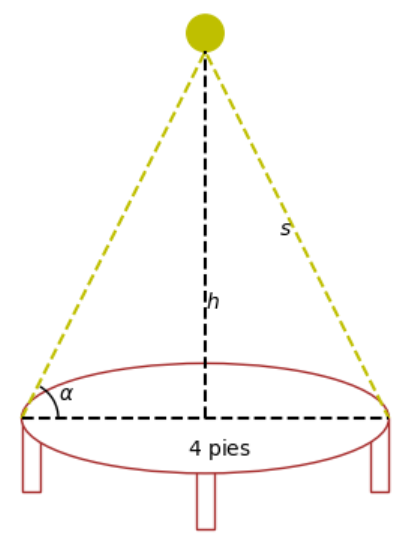

Una fuente luminosa se localiza sobre el centro de una mesa circular de 4 pies de diametro. Encontrar la altura h de la funete luminosa de modo tal que la iluminacion I en el perimetro de la mesa sea maxima si I = k(sin \alpha ) /s^2, donde s es la altura oblicua, \alpha es el angulo al cual la incide sobre la mesa y k es una constante ( El valor de esta ultima constante es irrelevante para el problema, ya que no se piude el valor de la iluminación.)

In [14]:
# Definir las variables simbólicas
h = sp.var('h', real=True, positive=True)
R = 2  # Radio de la mesa en pies
k = sp.var('k', real=True)  # La constante k

# Definir la distancia oblicua s
s = sp.sqrt(h**2 + R**2)

# Definir el ángulo de incidencia α
alpha = sp.atan2(R, h)

# Función de iluminación I
I = k * sp.sin(alpha) / s**2

# Derivar I respecto a h para encontrar el máximo
dI_dh = sp.diff(I, h)

# Encontrar la altura óptima h
h_opt = sp.solve(dI_dh, h)

# Evaluar la iluminación para diferentes valores de h
h_values = np.linspace(0.1, 10, 400)
I_values = []

for h_val in h_values:
    s_val = np.sqrt(h_val**2 + R**2)
    alpha_val = np.arctan2(R, h_val)
    I_val = np.sin(alpha_val) / s_val**2  # k se cancela en la comparación
    I_values.append(I_val)

# Encontrar el valor de la altura óptima y la iluminación máxima
h_opt_val = float(h_opt[0].evalf())
s_opt_val = np.sqrt(h_opt_val**2 + R**2)
alpha_opt_val = np.arctan2(R, h_opt_val)

# Usar subs para sustituir k en la función de iluminación
I_expr = k * sp.sin(alpha) / s**2
I_opt_expr = I_expr.subs(h, h_opt[0])
I_opt_val = I_opt_expr.subs(k, 1).evalf()  # Suponemos k = 1 para la evaluación

# Mostrar los valores óptimos
h_opt_val, I_opt_val

<class 'IndexError'>: list index out of range

In [12]:
theta = sp.var("theta")
W = 10 
k = 0.1
f = k * W / (sp.cos(theta) + k * sp.sin(theta))

df_dtheta = sp.diff(f, theta)
theta_opt = sp.solve(df_dtheta, theta)
theta_values = np.linspace(0.01, np.pi/2 - 0.01, 400)
f_values = []

for theta_val in theta_values:
    f_val = k * W / (np.cos(theta_val) + k * np.sin(theta_val))
    f_values.append(f_val)

theta_opt_val = float(theta_opt[0].evalf())
f_opt_val = k * W / (np.cos(theta_opt_val) + k * np.sin(theta_opt_val))

theta_opt_val, f_opt_val


(0.09966865249116202, 0.9950371902099893)